In [15]:
import os
import sys
import time
import copy
import random

from collections import OrderedDict

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from torchvision import datasets

import PIL

import matplotlib
from mpl_toolkits import mplot3d
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

import seaborn as sns

from livelossplot import PlotLosses

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import IncrementalPCA

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, classification_report


from IPython.display import Image

from tqdm.notebook import tqdm

sys.path.append("../src/expB/")
from ptcifar.models import ResNet18
import spheres
from learn_mfld_distance import test

In [9]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [10]:
train_set = torch.load("../datasets/expB/rby8/two_spheres/train_cifar_dim.pt")
val_set = torch.load("../datasets/expB/rby8/two_spheres/val_cifar_dim.pt")

In [11]:
BATCH_SIZE = 512
NUM_WORKERS = 8

dataloaders = {
    "train": DataLoader(dataset=train_set, shuffle=False, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, worker_init_fn=seed_worker),
    "val": DataLoader(dataset=val_set, shuffle=False, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, worker_init_fn=seed_worker)
}

In [45]:
model_fn = "../dumps/expB_learning_distance_from_mfld/CIFAR_ResNet18_TwoSpheres/30042021-094947/models/CIFAR_ResNet18_TwoSpheres_30042021-094947_val_loss_5.039928650856018_epoch_18.pth"
dump = torch.load(model_fn)

model = ResNet18(num_classes=2)
model.load_state_dict(dump["model_state_dict"])

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [46]:
mse, mse_on_mfld, all_distances, all_logits = test(model, dataloaders["train"], device, task="regression")




100%|██████████| 196/196 [00:36<00:00,  5.43it/s]

MSE for the learned distances: 4.9897704
MSE for the learned distances (on-manifold): 6.5730033


In [37]:
F.mse_loss(all_distances, all_logits)

tensor(16.9464)

In [29]:
all_logits, all_distances

(tensor([[2.6080, 7.5136],
         [2.6079, 7.5146],
         [2.6079, 7.5146],
         ...,
         [2.6079, 7.5146],
         [2.6079, 7.5146],
         [2.6080, 7.5136]]),
 tensor([[7.5000e+00, 4.7635e+00],
         [7.5000e+00, 7.5000e+00],
         [8.5265e-13, 7.5000e+00],
         ...,
         [1.4637e-12, 7.5000e+00],
         [7.5000e+00, 7.5000e+00],
         [7.5000e+00, 7.4181e-12]]))

(array([26851.,  1890.,  1933.,  1907.,  1843.,  1829.,  1825., 61922.]),
 array([0.    , 0.9375, 1.875 , 2.8125, 3.75  , 4.6875, 5.625 , 6.5625,
        7.5   ], dtype=float32),
 <BarContainer object of 8 artists>)

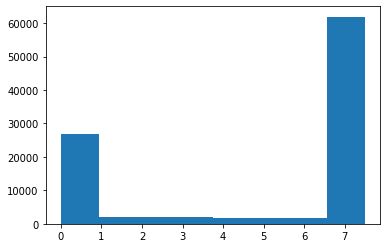

In [40]:
plt.hist(all_distances[:, 1].numpy().reshape(-1), bins=8)

(array([50000.,     0.,     0.,     0.,     0.,     0.,     0., 50000.]),
 array([7.5135145, 7.51365  , 7.513786 , 7.5139213, 7.514057 , 7.5141926,
        7.514328 , 7.514464 , 7.5145993], dtype=float32),
 <BarContainer object of 8 artists>)

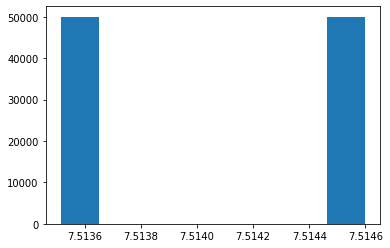

In [41]:
plt.hist(all_logits[:, 1].numpy().reshape(-1), bins=8)

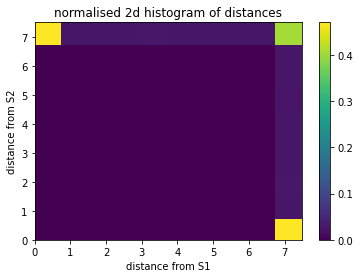

In [47]:
plt.hist2d(all_distances[:, 0].numpy(), all_distances[:, 1].numpy(), density=True)
plt.xlabel("distance from S1")
plt.ylabel("distance from S2")
plt.title("normalised 2d histogram of distances")
plt.colorbar()
plt.show()

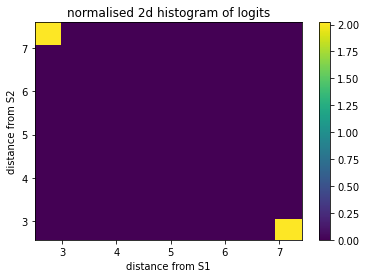

In [48]:
plt.hist2d(all_logits[:, 0].numpy(), all_logits[:, 1].numpy(), density=True)
plt.xlabel("distance from S1")
plt.ylabel("distance from S2")
plt.title("normalised 2d histogram of logits")
plt.colorbar()
plt.show()